In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve
import warnings
warnings.filterwarnings('ignore')

In [28]:
data = pd.read_csv('D:\Air quality data\city_day.csv')

In [29]:
print(data)

                City        Date  PM2.5   PM10     NO    NO2    NOx    NH3  \
0          Ahmedabad  01-01-2015    NaN    NaN   0.92  18.22  17.15    NaN   
1          Ahmedabad  02-01-2015    NaN    NaN   0.97  15.69  16.46    NaN   
2          Ahmedabad  03-01-2015    NaN    NaN  17.40  19.30  29.70    NaN   
3          Ahmedabad  04-01-2015    NaN    NaN   1.70  18.48  17.97    NaN   
4          Ahmedabad  05-01-2015    NaN    NaN  22.10  21.42  37.76    NaN   
...              ...         ...    ...    ...    ...    ...    ...    ...   
29526  Visakhapatnam  27-06-2020  15.02  50.94   7.68  25.06  19.54  12.47   
29527  Visakhapatnam  28-06-2020  24.38  74.09   3.42  26.06  16.53  11.99   
29528  Visakhapatnam  29-06-2020  22.91  65.73   3.45  29.53  18.33  10.71   
29529  Visakhapatnam  30-06-2020  16.64  49.97   4.05  29.26  18.80  10.03   
29530  Visakhapatnam  01-07-2020  15.00  66.00   0.40  26.85  14.05   5.20   

          CO    SO2      O3  Benzene  Toluene  Xylene   AQI    

In [30]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier

In [31]:
data.rename(columns={'AQI_Bucket': 'Air-quality'}, inplace =True)
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Air-quality
0,Ahmedabad,01-01-2015,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,02-01-2015,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,03-01-2015,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,04-01-2015,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,05-01-2015,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [32]:
data.shape

(29531, 16)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         29531 non-null  object 
 1   Date         29531 non-null  object 
 2   PM2.5        24933 non-null  float64
 3   PM10         18391 non-null  float64
 4   NO           25949 non-null  float64
 5   NO2          25946 non-null  float64
 6   NOx          25346 non-null  float64
 7   NH3          19203 non-null  float64
 8   CO           27472 non-null  float64
 9   SO2          25677 non-null  float64
 10  O3           25509 non-null  float64
 11  Benzene      23908 non-null  float64
 12  Toluene      21490 non-null  float64
 13  Xylene       11422 non-null  float64
 14  AQI          24850 non-null  float64
 15  Air-quality  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [34]:
data.isnull().sum()

City               0
Date               0
PM2.5           4598
PM10           11140
NO              3582
NO2             3585
NOx             4185
NH3            10328
CO              2059
SO2             3854
O3              4022
Benzene         5623
Toluene         8041
Xylene         18109
AQI             4681
Air-quality     4681
dtype: int64

In [35]:
data['PM2.5'].fillna(method='bfill', inplace=True)
data['PM10'].fillna(method='bfill', inplace=True)
data['NO'].fillna(method='ffill', inplace=True)
data['NO2'].fillna(method='ffill', inplace=True)
data['NOx'].fillna(method='ffill', inplace=True)
data['NH3'].fillna(method='bfill', inplace=True)
data['CO'].fillna(method='ffill', inplace=True)
data['SO2'].fillna(method='bfill', inplace=True)
data['O3'].fillna(method='bfill', inplace=True)
data['Benzene'].fillna(method='ffill', inplace=True)
data['Toluene'].fillna(method='ffill', inplace=True)
data['Xylene'].fillna(method='ffill', inplace=True)
data['AQI'].fillna(method='bfill', inplace=True)
data['Air-quality'].fillna(method='bfill', inplace=True)

In [36]:
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Air-quality
0,Ahmedabad,01-01-2015,73.24,141.54,0.92,18.22,17.15,26.64,0.92,27.64,133.36,0.00,0.02,0.00,209.0,Poor
1,Ahmedabad,02-01-2015,73.24,141.54,0.97,15.69,16.46,26.64,0.97,24.55,34.06,3.68,5.50,3.77,209.0,Poor
2,Ahmedabad,03-01-2015,73.24,141.54,17.40,19.30,29.70,26.64,17.40,29.07,30.70,6.80,16.40,2.25,209.0,Poor
3,Ahmedabad,04-01-2015,73.24,141.54,1.70,18.48,17.97,26.64,1.70,18.59,36.08,4.43,10.14,1.00,209.0,Poor
4,Ahmedabad,05-01-2015,73.24,141.54,22.10,21.42,37.76,26.64,22.10,39.33,39.31,7.01,18.89,2.78,209.0,Poor


In [37]:
data.isnull().sum()

City           0
Date           0
PM2.5          0
PM10           0
NO             0
NO2            0
NOx            0
NH3            0
CO             0
SO2            0
O3             0
Benzene        0
Toluene        0
Xylene         0
AQI            0
Air-quality    0
dtype: int64

In [38]:
data = data.drop(['Date','Xylene'], axis=1)

In [39]:
Benglore_data_mask = data['City'] == 'Bengaluru'
Banglore_data = data[Benglore_data_mask]
Delhi_data_mask = data['City'] == 'Delhi'
Delhi_data = data[Delhi_data_mask]
Hydrabad_data_mask = data['City'] == 'Hyderabad'
Hydrabad_data = data[Hydrabad_data_mask]

In [40]:
Banglore_data.shape

(2009, 14)

In [41]:
Banglore_data.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,Air-quality
4294,Bengaluru,30.65,70.46,3.26,17.33,10.88,20.36,0.33,3.54,10.73,0.56,4.64,91.0,Satisfactory
4295,Bengaluru,30.65,70.46,6.05,19.73,14.14,23.74,1.35,3.97,22.77,0.65,5.31,91.0,Satisfactory
4296,Bengaluru,30.65,70.46,11.91,19.88,20.72,4.32,17.40,13.61,12.03,0.53,19.25,91.0,Satisfactory
4297,Bengaluru,30.65,70.46,7.45,21.61,16.88,0.87,5.05,6.52,17.70,0.55,7.47,91.0,Satisfactory
4298,Bengaluru,30.65,70.46,9.52,22.17,21.76,31.38,1.83,4.71,12.72,0.40,4.36,91.0,Satisfactory


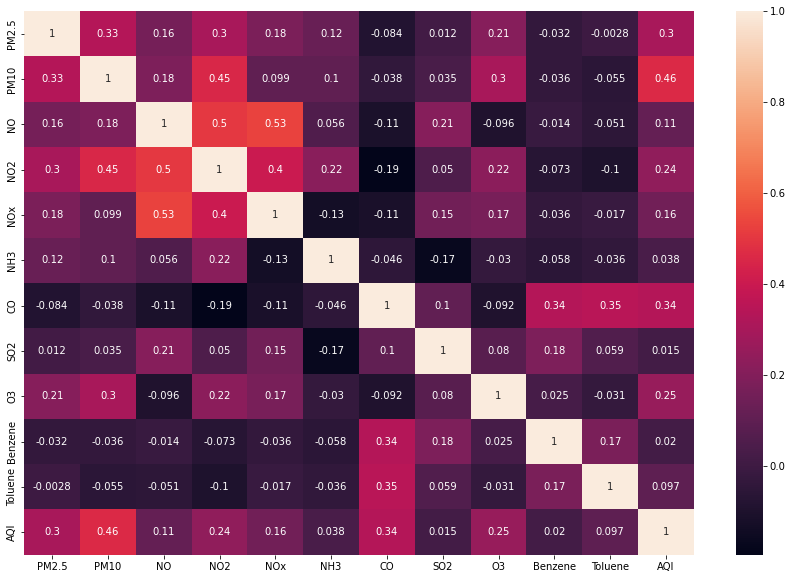

In [42]:
plt.figure(figsize=(15,10))
sns.heatmap(Banglore_data.corr(),annot=True)
plt.show();

In [43]:
Qt_1 = Banglore_data[['NO','PM2.5']].quantile(0.25)
Qt_3 = Banglore_data[['NO','PM2.5']].quantile(0.75)


i_q_r = Qt_3 - Qt_1
low_bound = Qt_1 - (1.5*i_q_r)
up_bound = Qt_3 + (1.5*i_q_r)

Banglore_data = Banglore_data[(Banglore_data['NO'] >= low_bound['NO']) & (Banglore_data['NO'] <=up_bound['NO'])]
Banglore_data = Banglore_data[(Banglore_data['PM2.5'] >= low_bound['PM2.5']) & (Banglore_data['PM2.5'] <=up_bound['PM2.5'])]

In [44]:
Banglore_data.shape

(1843, 14)

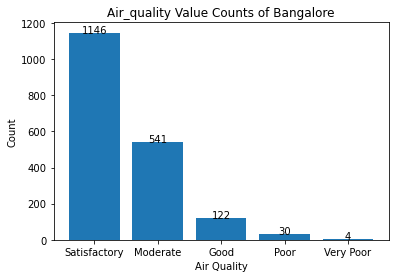

In [45]:
value_counts = Banglore_data['Air-quality'].value_counts()

# Creating a bar plot to visualize the distribution of Air Quality categories in Bengalore.
plt.bar(value_counts.index, value_counts.values)

# Adding a title to the plot indicating the variable being visualized and the city.
plt.title(f"{'Air_quality'} Value Counts of Bangalore")

# Adding labels to the x and y axes.
plt.xlabel('Air Quality')
plt.ylabel("Count")

# Adding text annotations to each bar with the count of occurrences.
for i, v in enumerate(value_counts.values):
    plt.text(i, v, str(v), color='black', ha='center')

# Displaying the bar plot.
plt.show()

In [46]:
from sklearn.preprocessing import LabelEncoder
# Creating a LabelEncoder object.
lbl_enc = LabelEncoder()

# Applying label encoding to the 'Air_quality' column in the 'Bengalore' data.
Banglore_data['Air-quality'] = lbl_enc.fit_transform(Banglore_data['Air-quality'])

In [47]:
Banglore_data.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,Air-quality
4294,Bengaluru,30.65,70.46,3.26,17.33,10.88,20.36,0.33,3.54,10.73,0.56,4.64,91.0,3
4295,Bengaluru,30.65,70.46,6.05,19.73,14.14,23.74,1.35,3.97,22.77,0.65,5.31,91.0,3
4296,Bengaluru,30.65,70.46,11.91,19.88,20.72,4.32,17.40,13.61,12.03,0.53,19.25,91.0,3
4297,Bengaluru,30.65,70.46,7.45,21.61,16.88,0.87,5.05,6.52,17.70,0.55,7.47,91.0,3
4298,Bengaluru,30.65,70.46,9.52,22.17,21.76,31.38,1.83,4.71,12.72,0.40,4.36,91.0,3


In [48]:
X = Banglore_data.drop(['AQI', 'City'], axis=1)
Y = Banglore_data['AQI']

In [49]:
from sklearn.ensemble import ExtraTreesClassifier
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5, criterion ='entropy', max_features = 12)

# Training the model
extra_tree_forest.fit(X, Y)

# Computing the importance of each feature
feature_importance = extra_tree_forest.feature_importances_

# Normalizing the individual importances
feature_importance_normalized = np.std([tree.feature_importances_ for tree in extra_tree_forest.estimators_], axis = 0)

In [50]:
X_Train, X_Test, Y_Train, Y_test = train_test_split(X, Y, test_size=0.2)

In [51]:
rfm = RandomForestClassifier(max_depth=5, n_estimators=5)
rfm.fit(X_Train, Y_Train)

# Making Prediction.
y_pred_ben = rfm.predict(X_Test)

# Calculating metrics for evaluating the model's performance on the test data.
acc_ben = accuracy_score(Y_test, y_pred_ben)
f1_ben = f1_score(Y_test, y_pred_ben, average='weighted')
recall_ben = recall_score(Y_test, y_pred_ben, average= 'weighted')
precision_ben = precision_score(Y_test, y_pred_ben, average= 'weighted')

# Displaying the evaluation metrics.
print("Accuracy:", acc_ben)
print('Precision:', precision_ben)
print('Recall:', recall_ben)
print('F1 SCore:', f1_ben)

Accuracy: 0.07859078590785908
Precision: 0.030320312027629095
Recall: 0.07859078590785908
F1 SCore: 0.040415976385029626


In [52]:
Delhi_data.shape

(2009, 14)

In [53]:
Delhi_data.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,Air-quality
10229,Delhi,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,472.0,Severe
10230,Delhi,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,454.0,Severe
10231,Delhi,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,143.0,Moderate
10232,Delhi,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,319.0,Very Poor
10233,Delhi,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,325.0,Very Poor


In [54]:
print(Delhi_data)

        City   PM2.5    PM10     NO    NO2     NOx     NH3     CO    SO2  \
10229  Delhi  313.22  607.98  69.16  36.39  110.59   33.85  15.20   9.25   
10230  Delhi  186.18  269.55  62.09  32.87   88.14   31.83   9.54   6.65   
10231  Delhi   87.18  131.90  25.73  30.31   47.95   69.55  10.61   2.65   
10232  Delhi  151.84  241.84  25.01  36.91   48.62  130.36  11.54   4.63   
10233  Delhi  146.60  219.13  14.01  34.92   38.25  122.88   9.20   3.33   
...      ...     ...     ...    ...    ...     ...     ...    ...    ...   
12233  Delhi   39.80  155.94  10.88  21.46   22.47   31.43   0.87  10.38   
12234  Delhi   59.52  308.65  12.67  21.60   23.86   29.27   0.94  10.70   
12235  Delhi   44.86  184.12  10.50  21.57   21.94   27.97   0.88  11.58   
12236  Delhi   39.80   91.98   5.99  17.96   15.44   28.48   0.84  10.51   
12237  Delhi   54.01  128.66   6.33  21.05   16.81   29.06   0.97  11.15   

          O3  Benzene  Toluene    AQI Air-quality  
10229  41.68    14.36    24.86  472

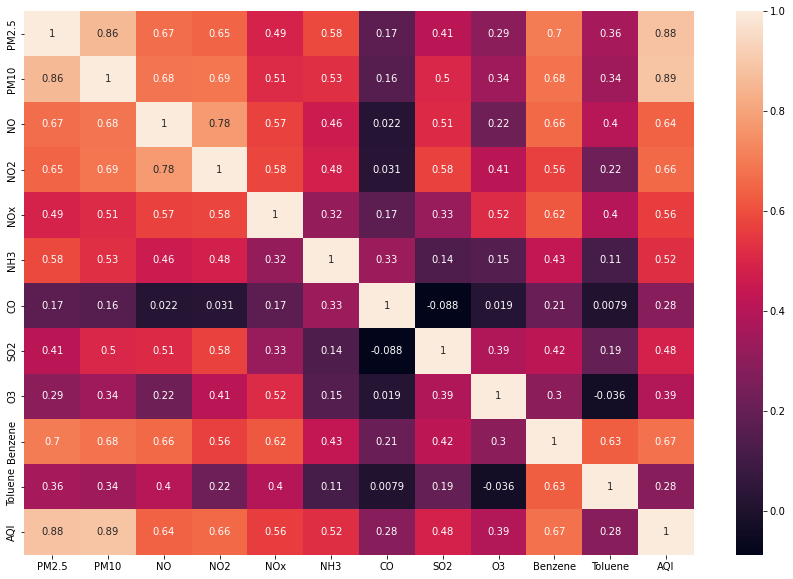

In [55]:
# Creating a new figure with a specific size (15 inches in width and 10 inches in height).
plt.figure(figsize=(15, 10))

# Creating a heatmap of the correlation matrix for the 'Bengalore' data.
# The 'corr()' method calculates the correlation between different columns in the DataFrame.
# The 'annot=True' parameter adds the correlation values to the heatmap.
sns.heatmap(Delhi_data.corr(), annot=True)

# Displaying the heatmap.
plt.show();

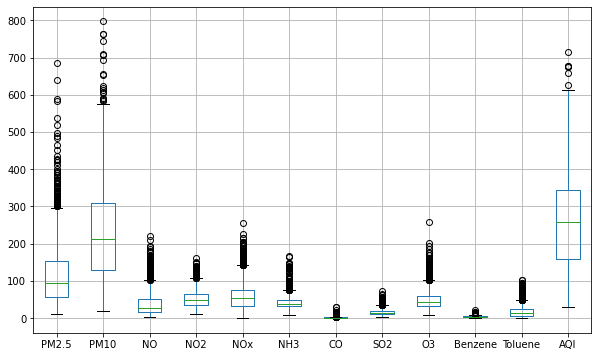

In [56]:
# Creating a new figure with a specific size (10 inches in width and 6 inches in height).
plt.figure(figsize=(10, 6))

# Creating a boxplot to visualize the distribution and identify outliers in the 'Bengalore' data.
Delhi_data.boxplot()

# Displaying the boxplot.
plt.show();

In [57]:
Qt_1 = Delhi_data[['NO', 'PM2.5']].quantile(0.25)
Qt_3 = Delhi_data[['NO', 'PM2.5']].quantile(0.75)

# Calculating the Interquartile Range (IQR) for the 'NO' and 'PM2.5' columns.
i_q_r = Qt_3 - Qt_1

# Calculating the lower and upper bounds for identifying outliers using the IQR method.
low_bound = Qt_1 - (1.5 * i_q_r)
up_bound = Qt_3 + (1.5 * i_q_r)

# Removing outliers from the 'NO' column within the specified bounds.
Delhi_data = Delhi_data[(Delhi_data['NO'] >= low_bound['NO']) & (Delhi_data['NO'] <= up_bound['NO'])]

# Removing outliers from the 'PM2.5' column within the specified bounds.
Delhi_data = Delhi_data[(Delhi_data['PM2.5'] >= low_bound['PM2.5']) & (Delhi_data['PM2.5'] <= up_bound['PM2.5'])]

In [58]:
Delhi_data.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,Air-quality
10230,Delhi,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,454.0,Severe
10231,Delhi,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,143.0,Moderate
10232,Delhi,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,319.0,Very Poor
10233,Delhi,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,325.0,Very Poor
10234,Delhi,149.58,252.10,17.21,37.84,42.46,134.97,9.44,3.66,26.83,3.63,7.35,318.0,Very Poor


In [59]:
Delhi_data.shape

(1836, 14)

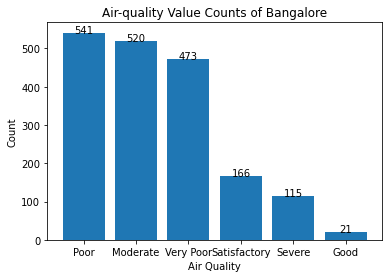

In [60]:
# Calculating the value counts of the 'Air_quality' column in the 'Bengalore' data.
value_counts = Delhi_data['Air-quality'].value_counts()

# Creating a bar plot to visualize the distribution of Air Quality categories in Bengalore.
plt.bar(value_counts.index, value_counts.values)

# Adding a title to the plot indicating the variable being visualized and the city.
plt.title(f"{'Air-quality'} Value Counts of Bangalore")

# Adding labels to the x and y axes.
plt.xlabel('Air Quality')
plt.ylabel("Count")

# Adding text annotations to each bar with the count of occurrences.
for i, v in enumerate(value_counts.values):
    plt.text(i, v, str(v), color='black', ha='center')

# Displaying the bar plot.
plt.show()

In [61]:
from sklearn.preprocessing import LabelEncoder
# Creating a LabelEncoder object.
lbl_enc = LabelEncoder()

# Applying label encoding to the 'Air_quality' column in the 'Bengalore' data.
Delhi_data['Air-quality'] = lbl_enc.fit_transform(Delhi_data['Air-quality'])

In [62]:
Delhi_data.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,Air-quality
10230,Delhi,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,454.0,4
10231,Delhi,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,143.0,1
10232,Delhi,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,319.0,5
10233,Delhi,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,325.0,5
10234,Delhi,149.58,252.10,17.21,37.84,42.46,134.97,9.44,3.66,26.83,3.63,7.35,318.0,5


In [63]:
X = Delhi_data.drop(['AQI', 'City'], axis=1)
Y = Delhi_data['AQI']

In [64]:
# Building the model
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5, criterion ='entropy', max_features = 12)

# Training the model
extra_tree_forest.fit(X, Y)

# Computing the importance of each feature
feature_importance = extra_tree_forest.feature_importances_

# Normalizing the individual importances
feature_importance_normalized = np.std([tree.feature_importances_ for tree in extra_tree_forest.estimators_], axis = 0)

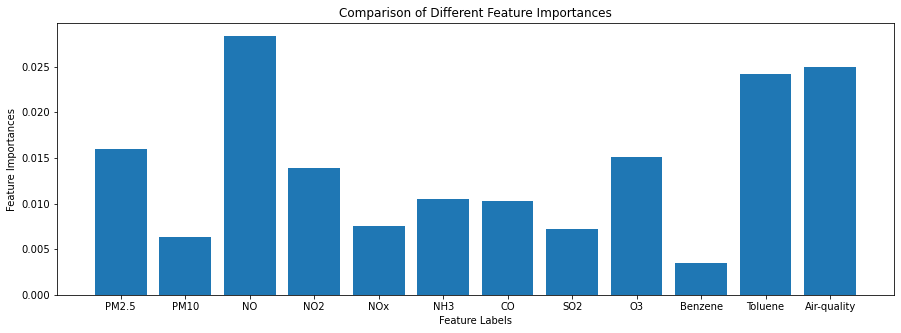

In [65]:
# Creating a new figure with a specific size (15 inches in width and 5 inches in height).
plt.figure(figsize=(15, 5))

# Creating a bar graph to compare feature importances.
# X.columns represents the feature labels, and feature_importance_normalized represents the corresponding importances.
plt.bar(X.columns, feature_importance_normalized)

# Adding labels to the x and y axes.
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')

# Adding a title to the plot.
plt.title('Comparison of Different Feature Importances')

# Displaying the bar graph.
plt.show()

In [66]:
# Dropping the feature with least importance.
Delhi_data = Delhi_data.drop(['Toluene'], axis=1)

In [67]:
X = Delhi_data.drop(['Air-quality', 'City'], axis=1)
Y = Delhi_data['Air-quality']

In [68]:
# Spliting Dataset into training and testing.
X_Train, X_Test, Y_Train, Y_test = train_test_split(X, Y, test_size=0.2)

In [69]:
# Applying Random Forest classifier.
rfm = RandomForestClassifier(max_depth=5, n_estimators=5)
rfm.fit(X_Train, Y_Train)

# Making Prediction.
y_pred_ben = rfm.predict(X_Test)

# Calculating metrics for evaluating the model's performance on the test data.
acc_ben = accuracy_score(Y_test, y_pred_ben)
f1_ben = f1_score(Y_test, y_pred_ben, average='weighted')
recall_ben = recall_score(Y_test, y_pred_ben, average= 'weighted')
precision_ben = precision_score(Y_test, y_pred_ben, average= 'weighted')

# Displaying the evaluation metrics.
print("Accuracy:", acc_ben)
print('Precision:', precision_ben)
print('Recall:', recall_ben)
print('F1 SCore:', f1_ben)

Accuracy: 0.9320652173913043
Precision: 0.9343087838814581
Recall: 0.9320652173913043
F1 SCore: 0.9270693301718306


In [70]:
from sklearn.metrics import confusion_matrix
matrix =  confusion_matrix(Y_test,y_pred_ben)
print(matrix)

[[  3   0   0   0   0   0]
 [  0 110   0   0   0   0]
 [  0   0 109   0   0   0]
 [  0   8   0  23   0   0]
 [  0   0   0   0  14  12]
 [  0   0   4   0   1  84]]


In [71]:
Hydrabad_data.shape

(2006, 14)

In [72]:
Hydrabad_data.head(10)

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,Air-quality
14581,Hyderabad,47.03,93.0,3.70,17.19,20.89,24.94,0.30,2.58,30.34,0.41,6.15,120.0,Moderate
14582,Hyderabad,47.03,93.0,3.61,9.69,13.30,24.94,0.23,5.19,31.28,0.39,7.22,120.0,Moderate
14583,Hyderabad,47.03,93.0,4.21,22.02,26.23,24.94,0.31,9.09,28.56,0.52,5.14,120.0,Moderate
14584,Hyderabad,47.03,93.0,26.08,40.08,66.15,24.94,0.53,9.03,31.08,1.92,16.35,120.0,Moderate
14585,Hyderabad,47.03,93.0,10.31,33.02,43.33,24.94,0.44,8.47,35.72,1.89,14.27,120.0,Moderate
14586,Hyderabad,47.03,93.0,8.79,31.60,40.39,24.94,0.39,8.92,34.77,0.77,12.47,120.0,Moderate
14587,Hyderabad,47.03,93.0,8.12,32.52,40.64,24.94,0.43,9.59,34.63,1.14,14.06,120.0,Moderate
14588,Hyderabad,47.03,93.0,14.00,31.96,45.96,24.94,0.39,12.53,38.74,1.02,10.40,120.0,Moderate
14589,Hyderabad,47.03,93.0,13.26,30.20,43.46,24.94,0.48,8.58,20.94,0.92,15.16,120.0,Moderate
14590,Hyderabad,47.03,93.0,33.63,23.37,57.00,24.94,0.72,3.01,13.66,2.05,17.65,120.0,Moderate


In [73]:
 print(Hydrabad_data)

            City  PM2.5   PM10     NO    NO2    NOx    NH3    CO   SO2     O3  \
14581  Hyderabad  47.03  93.00   3.70  17.19  20.89  24.94  0.30  2.58  30.34   
14582  Hyderabad  47.03  93.00   3.61   9.69  13.30  24.94  0.23  5.19  31.28   
14583  Hyderabad  47.03  93.00   4.21  22.02  26.23  24.94  0.31  9.09  28.56   
14584  Hyderabad  47.03  93.00  26.08  40.08  66.15  24.94  0.53  9.03  31.08   
14585  Hyderabad  47.03  93.00  10.31  33.02  43.33  24.94  0.44  8.47  35.72   
...          ...    ...    ...    ...    ...    ...    ...   ...   ...    ...   
16582  Hyderabad  23.29  44.20   6.38  22.64  15.39   9.34  0.36  5.39  24.22   
16583  Hyderabad  15.80  32.18   5.79  22.73  14.89  11.09  0.36  6.36  22.25   
16584  Hyderabad  20.24  44.74   3.96  27.59  17.09  13.09  0.38  6.29  19.98   
16585  Hyderabad  19.38  41.95   2.63  24.58  14.59  10.80  0.39  5.30  17.40   
16586  Hyderabad  26.83  66.50   2.94  27.18  16.13   9.32  0.43  6.07  13.20   

       Benzene  Toluene    

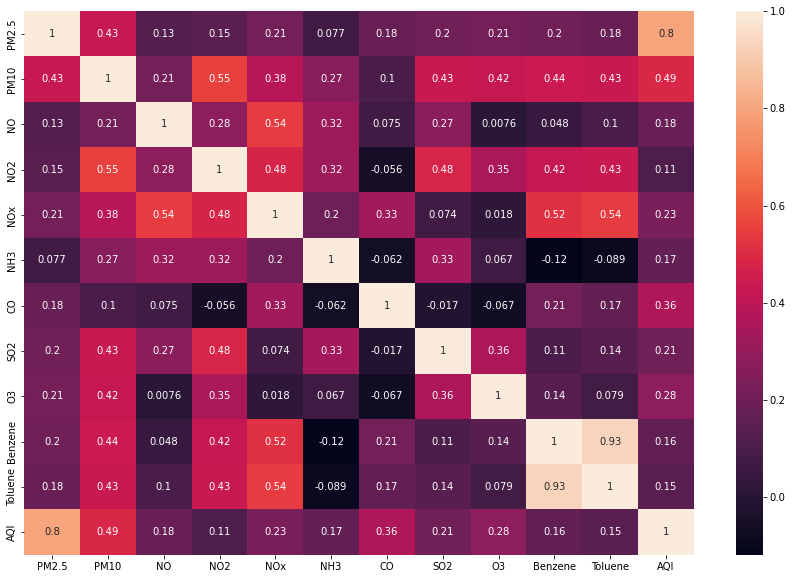

In [74]:
# Creating a new figure with a specific size (15 inches in width and 10 inches in height).
plt.figure(figsize=(15, 10))

# Creating a heatmap of the correlation matrix for the 'Bengalore' data.
# The 'corr()' method calculates the correlation between different columns in the DataFrame.
# The 'annot=True' parameter adds the correlation values to the heatmap.
sns.heatmap(Hydrabad_data.corr(), annot=True)

# Displaying the heatmap.
plt.show();

In [75]:
Qt_1 = Hydrabad_data[['NO', 'PM2.5']].quantile(0.25)
Qt_3 = Hydrabad_data[['NO', 'PM2.5']].quantile(0.75)

# Calculating the Interquartile Range (IQR) for the 'NO' and 'PM2.5' columns.
i_q_r = Qt_3 - Qt_1

# Calculating the lower and upper bounds for identifying outliers using the IQR method.
low_bound = Qt_1 - (1.5 * i_q_r)
up_bound = Qt_3 + (1.5 * i_q_r)

# Removing outliers from the 'NO' column within the specified bounds.
Hydrabad_data = Hydrabad_data[(Hydrabad_data['NO'] >= low_bound['NO']) & (Hydrabad_data['NO'] <= up_bound['NO'])]

# Removing outliers from the 'PM2.5' column within the specified bounds.
Hydrabad_data = Hydrabad_data[(Hydrabad_data['PM2.5'] >= low_bound['PM2.5']) & (Hydrabad_data['PM2.5'] <= up_bound['PM2.5'])]

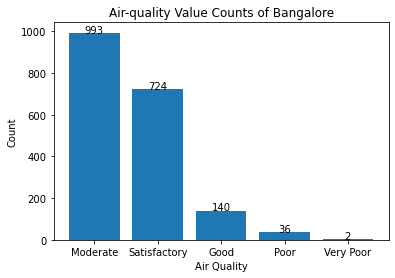

In [76]:
# Calculating the value counts of the 'Air_quality' column in the 'Bengalore' data.
value_counts = Hydrabad_data['Air-quality'].value_counts()

# Creating a bar plot to visualize the distribution of Air Quality categories in Bengalore.
plt.bar(value_counts.index, value_counts.values)

# Adding a title to the plot indicating the variable being visualized and the city.
plt.title(f"{'Air-quality'} Value Counts of Bangalore")

# Adding labels to the x and y axes.
plt.xlabel('Air Quality')
plt.ylabel("Count")

# Adding text annotations to each bar with the count of occurrences.
for i, v in enumerate(value_counts.values):
    plt.text(i, v, str(v), color='black', ha='center')

# Displaying the bar plot.
plt.show()

In [77]:
X = Hydrabad_data.drop(['AQI', 'City'], axis=1)
Y = Hydrabad_data['AQI']

In [87]:
from sklearn.ensemble import ExtraTreesClassifier
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5, criterion ='entropy', max_features = 12)

# Training the model
extra_tree_forest.fit(X, Y)

# Computing the importance of each feature
feature_importance = extra_tree_forest.feature_importances_

# Normalizing the individual importances
feature_importance_normalized = np.std([tree.feature_importances_ for tree in extra_tree_forest.estimators_], axis = 0)

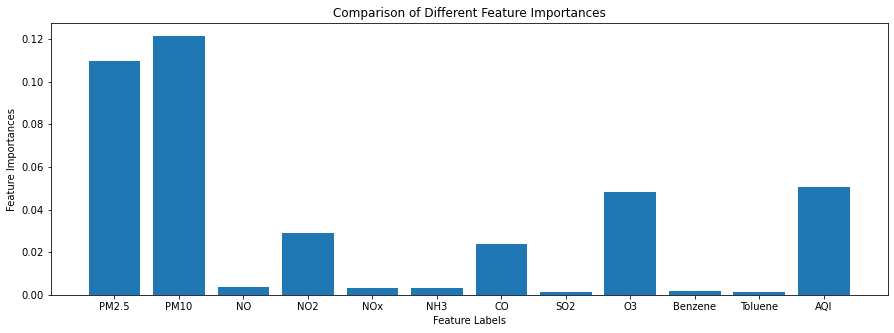

In [89]:
# Creating a new figure with a specific size (15 inches in width and 5 inches in height).
plt.figure(figsize=(15, 5))

# Creating a bar graph to compare feature importances.
# X.columns represents the feature labels, and feature_importance_normalized represents the corresponding importances.
plt.bar(X.columns, feature_importance_normalized)

# Adding labels to the x and y axes.
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')

# Adding a title to the plot.
plt.title('Comparison of Different Feature Importances')

# Displaying the bar graph.
plt.show()

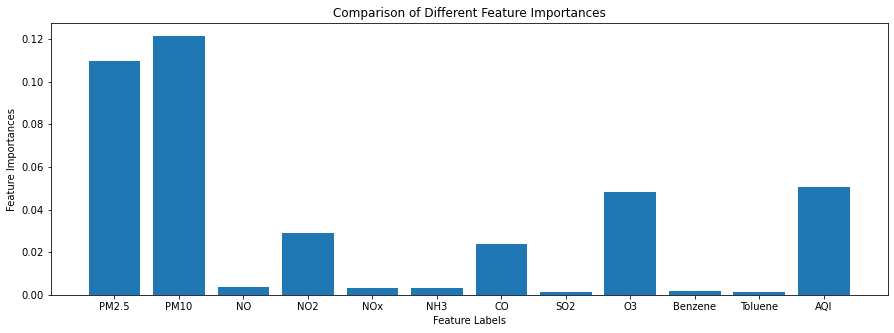

In [90]:
# Creating a new figure with a specific size (15 inches in width and 5 inches in height).
plt.figure(figsize=(15, 5))

# Creating a bar graph to compare feature importances.
# X.columns represents the feature labels, and feature_importance_normalized represents the corresponding importances.
plt.bar(X.columns, feature_importance_normalized)

# Adding labels to the x and y axes.
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')

# Adding a title to the plot.
plt.title('Comparison of Different Feature Importances')

# Displaying the bar graph.
plt.show()

In [91]:
X = Hydrabad_data.drop(['Air-quality', 'City'], axis=1)
Y = Hydrabad_data['Air-quality']

In [92]:
# Spliting Dataset into training and testing.
X_Train, X_Test, Y_Train, Y_test = train_test_split(X, Y, test_size=0.2)

In [93]:
# Applying Random Forest classifier.
rfm = RandomForestClassifier(max_depth=5, n_estimators=5)
rfm.fit(X_Train, Y_Train)

# Making Prediction.
y_pred_ben = rfm.predict(X_Test)

# Calculating metrics for evaluating the model's performance on the test data.
acc_ben = accuracy_score(Y_test, y_pred_ben)
f1_ben = f1_score(Y_test, y_pred_ben, average='weighted')
recall_ben = recall_score(Y_test, y_pred_ben, average= 'weighted')
precision_ben = precision_score(Y_test, y_pred_ben, average= 'weighted')

# Displaying the evaluation metrics.
print("Accuracy:", acc_ben)
print('Precision:', precision_ben)
print('Recall:', recall_ben)
print('F1 SCore:', f1_ben)

Accuracy: 0.9815303430079155
Precision: 0.9821703806264532
Recall: 0.9815303430079155
F1 SCore: 0.9773835871055786


In [94]:
from sklearn.metrics import confusion_matrix
matrix =  confusion_matrix(Y_test,y_pred_ben)
print(matrix)

[[ 29   0   0   0]
 [  0 195   0   0]
 [  0   7   4   0]
 [  0   0   0 144]]
